# Topic

The topic choose here is the wine quality. We are using two datasets with red and white wine samples.
The inputs include objective tests (for example, PH values) and the output is based on sensory data (median of at least 3 evaluations made by wine experts). 

Each expert graded the wine quality between 0 (very bad) and 10 (very excellent).

# Objectif

In this project we will try to identify, via the linear regression method, the quality of the wine (our target) among the features of the dataset : 

# Import librairies

In [303]:
import pandas as pd
from pandas_visual_analysis import VisualAnalysis
import seaborn as sns
from visualizer import Visualizer

import matplotlib.pyplot as plt
import seaborn as sns

# Manipulating

## Read files and concatenate

In [304]:
#dataset red wine and white wine
url1='/Users/tatiana/WineQuality/data/winequality-red.csv'
url2='/Users/tatiana/WineQuality/data/winequality-white.csv'

In [305]:
#read the csv files
df1=pd.read_csv(url1)
df2=pd.read_csv(url2)

In [306]:
#look at the dataframe
df1

fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"
0      7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5                                                                                                                     
1      7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5                                                                                                                     
2     7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...                                                                                                                     
3     11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...                                                                                                                     
4      7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5                                                                                                                     
...                                                 ...                                                                                                                     
1594  6.2;0.6;0.08;2;0.09;32;44;0.9949;3.45;0.58;10.5;5                                                                                                                     
1595  5.9;0.55;0.1;2.2;0.062;39;51;0.99512;3.52;0.76...                                                                                                                     
1596  6.3;0.51;0.13;2.3;0.076;29;40;0.99574;3.42;0.7...                                                                                                                     
1597  5.9;0.645;0.12;2;0.075;32;44;0.99547;3.57;0.71...                                                                                                                     
1598  6;0.31;0.47;3.6;0.067;18;42;0.99549;3.39;0.66;...                                                                                                                     

[1599 rows x 1 columns]

In [307]:
df2

fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"
0      7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6                                                                                                                     
1     6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9...                                                                                                                     
2     8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;1...                                                                                                                     
3     7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...                                                                                                                     
4     7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...                                                                                                                     
...                                                 ...                                                                                                                     
4893  6.2;0.21;0.29;1.6;0.039;24;92;0.99114;3.27;0.5...                                                                                                                     
4894  6.6;0.32;0.36;8;0.047;57;168;0.9949;3.15;0.46;...                                                                                                                     
4895  6.5;0.24;0.19;1.2;0.041;30;111;0.99254;2.99;0....                                                                                                                     
4896  5.5;0.29;0.3;1.1;0.022;20;110;0.98869;3.34;0.3...                                                                                                                     
4897  6;0.21;0.38;0.8;0.02;22;98;0.98941;3.26;0.32;1...                                                                                                                     

[4898 rows x 1 columns]

In [308]:
df1.columns

Index(['fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"'], dtype='object')

In [309]:
df2.columns

Index(['fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"'], dtype='object')

All the data are located in the column :
    split all after ";"
In the column names :
    1.replace le space by a "_"
    2.delete "" for some of them

## Concatenate files

In [310]:
df_wines=df1.append(df2)

In [311]:
df_wines

fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"
0      7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5                                                                                                                     
1      7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5                                                                                                                     
2     7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...                                                                                                                     
3     11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...                                                                                                                     
4      7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5                                                                                                                     
...                                                 ...                                                                                                                     
4893  6.2;0.21;0.29;1.6;0.039;24;92;0.99114;3.27;0.5...                                                                                                                     
4894  6.6;0.32;0.36;8;0.047;57;168;0.9949;3.15;0.46;...                                                                                                                     
4895  6.5;0.24;0.19;1.2;0.041;30;111;0.99254;2.99;0....                                                                                                                     
4896  5.5;0.29;0.3;1.1;0.022;20;110;0.98869;3.34;0.3...                                                                                                                     
4897  6;0.21;0.38;0.8;0.02;22;98;0.98941;3.26;0.32;1...                                                                                                                     

[6497 rows x 1 columns]

In [312]:
df_rows = df1.shape[0]+df2.shape[0]
df_wines_rows = df_wines.shape[0]

if df_rows == df_wines_rows :
    print('Good! the number of rows expected and the number of the new dataframe are the same')
else:
    print('Grrr, pb of number of rows!')
print(f'After having concontenate both dataframes, number of rows is {df_wines_rows} and\na sum of rows of both dataframe is {df_rows}')

Good! the number of rows expected and the number of the new dataframe are the same
After having concontenate both dataframes, number of rows is 6497 and
a sum of rows of both dataframe is 6497


## Split

Now, split (;) all the dataframe

In [313]:
#split the dataframe into columns.
df_wine = df_wines.iloc[:,0].str.split(';', expand=True)

In [314]:
df_wine

0     1     2    3      4   5    6        7     8     9     10 11
0      7.4   0.7     0  1.9  0.076  11   34   0.9978  3.51  0.56   9.4  5
1      7.8  0.88     0  2.6  0.098  25   67   0.9968   3.2  0.68   9.8  5
2      7.8  0.76  0.04  2.3  0.092  15   54    0.997  3.26  0.65   9.8  5
3     11.2  0.28  0.56  1.9  0.075  17   60    0.998  3.16  0.58   9.8  6
4      7.4   0.7     0  1.9  0.076  11   34   0.9978  3.51  0.56   9.4  5
...    ...   ...   ...  ...    ...  ..  ...      ...   ...   ...   ... ..
4893   6.2  0.21  0.29  1.6  0.039  24   92  0.99114  3.27   0.5  11.2  6
4894   6.6  0.32  0.36    8  0.047  57  168   0.9949  3.15  0.46   9.6  5
4895   6.5  0.24  0.19  1.2  0.041  30  111  0.99254  2.99  0.46   9.4  6
4896   5.5  0.29   0.3  1.1  0.022  20  110  0.98869  3.34  0.38  12.8  7
4897     6  0.21  0.38  0.8   0.02  22   98  0.98941  3.26  0.32  11.8  6

[6497 rows x 12 columns]

Columns has been created : OK. We need names for the columns. We will use those from our original dataframe

In [315]:
#give the names of the columns of the df_wine thanks to the original dataframe
df_wine.columns = df1.columns[0].split(';')

In [316]:
df_wine.head()

fixed acidity "volatile acidity" "citric acid" "residual sugar" "chlorides"  \
0           7.4                0.7             0              1.9       0.076   
1           7.8               0.88             0              2.6       0.098   
2           7.8               0.76          0.04              2.3       0.092   
3          11.2               0.28          0.56              1.9       0.075   
4           7.4                0.7             0              1.9       0.076   

  "free sulfur dioxide" "total sulfur dioxide" "density"  "pH" "sulphates"  \
0                    11                     34    0.9978  3.51        0.56   
1                    25                     67    0.9968   3.2        0.68   
2                    15                     54     0.997  3.26        0.65   
3                    17                     60     0.998  3.16        0.58   
4                    11                     34    0.9978  3.51        0.56   

  "alcohol" "quality"  
0       9.4         5  
1       9.8         5  
2       9.8         5  
3       9.8         6  
4       9.4         5

## Add a column in the dataframe - color of the wine : red or white

In [317]:
#add new column in the 1st position : color with 2 unique values, red or white
df_wine.insert(0, "color", "Red") 

In [318]:
df_wine.columns

Index(['color', 'fixed acidity', '"volatile acidity"', '"citric acid"',
       '"residual sugar"', '"chlorides"', '"free sulfur dioxide"',
       '"total sulfur dioxide"', '"density"', '"pH"', '"sulphates"',
       '"alcohol"', '"quality"'],
      dtype='object')

The column color has been added in the 1rst place and fill with red value, with success.
Now we will replace red by white in the column color for the white win of the dataframe

In [319]:
last_row_red = df1.shape[0]#last row in the dataframe of red wine

df_wine.loc[last_row_red:,'color'] = "white"#replace white by red in the dataframe wine
df_wine

color fixed acidity "volatile acidity" "citric acid" "residual sugar"  \
0       Red           7.4                0.7             0              1.9   
1       Red           7.8               0.88             0              2.6   
2       Red           7.8               0.76          0.04              2.3   
3       Red          11.2               0.28          0.56              1.9   
4       Red           7.4                0.7             0              1.9   
...     ...           ...                ...           ...              ...   
4893  white           6.2               0.21          0.29              1.6   
4894  white           6.6               0.32          0.36                8   
4895  white           6.5               0.24          0.19              1.2   
4896  white           5.5               0.29           0.3              1.1   
4897  white             6               0.21          0.38              0.8   

     "chlorides" "free sulfur dioxide" "total sulfur dioxide" "density"  "pH"  \
0          0.076                    11                     34    0.9978  3.51   
1          0.098                    25                     67    0.9968   3.2   
2          0.092                    15                     54     0.997  3.26   
3          0.075                    17                     60     0.998  3.16   
4          0.076                    11                     34    0.9978  3.51   
...          ...                   ...                    ...       ...   ...   
4893       0.039                    24                     92   0.99114  3.27   
4894       0.047                    57                    168    0.9949  3.15   
4895       0.041                    30                    111   0.99254  2.99   
4896       0.022                    20                    110   0.98869  3.34   
4897        0.02                    22                     98   0.98941  3.26   

     "sulphates" "alcohol" "quality"  
0           0.56       9.4         5  
1           0.68       9.8         5  
2           0.65       9.8         5  
3           0.58       9.8         6  
4           0.56       9.4         5  
...          ...       ...       ...  
4893         0.5      11.2         6  
4894        0.46       9.6         5  
4895        0.46       9.4         6  
4896        0.38      12.8         7  
4897        0.32      11.8         6  

[6497 rows x 13 columns]

# Cleanning

## Columns

In [320]:
#replace spaces in the names'columns by _
df_wine.columns = df_wine.columns.str.replace(' ', '_')

In [321]:
df_wine

color fixed_acidity "volatile_acidity" "citric_acid" "residual_sugar"  \
0       Red           7.4                0.7             0              1.9   
1       Red           7.8               0.88             0              2.6   
2       Red           7.8               0.76          0.04              2.3   
3       Red          11.2               0.28          0.56              1.9   
4       Red           7.4                0.7             0              1.9   
...     ...           ...                ...           ...              ...   
4893  white           6.2               0.21          0.29              1.6   
4894  white           6.6               0.32          0.36                8   
4895  white           6.5               0.24          0.19              1.2   
4896  white           5.5               0.29           0.3              1.1   
4897  white             6               0.21          0.38              0.8   

     "chlorides" "free_sulfur_dioxide" "total_sulfur_dioxide" "density"  "pH"  \
0          0.076                    11                     34    0.9978  3.51   
1          0.098                    25                     67    0.9968   3.2   
2          0.092                    15                     54     0.997  3.26   
3          0.075                    17                     60     0.998  3.16   
4          0.076                    11                     34    0.9978  3.51   
...          ...                   ...                    ...       ...   ...   
4893       0.039                    24                     92   0.99114  3.27   
4894       0.047                    57                    168    0.9949  3.15   
4895       0.041                    30                    111   0.99254  2.99   
4896       0.022                    20                    110   0.98869  3.34   
4897        0.02                    22                     98   0.98941  3.26   

     "sulphates" "alcohol" "quality"  
0           0.56       9.4         5  
1           0.68       9.8         5  
2           0.65       9.8         5  
3           0.58       9.8         6  
4           0.56       9.4         5  
...          ...       ...       ...  
4893         0.5      11.2         6  
4894        0.46       9.6         5  
4895        0.46       9.4         6  
4896        0.38      12.8         7  
4897        0.32      11.8         6  

[6497 rows x 13 columns]

Spaces in the columns have been replaced by _ >> OK

In [322]:
#delete "" in the names'columns 
df_wine.columns = df_wine.columns.str.replace('"', '')

In [323]:
df_wine

color fixed_acidity volatile_acidity citric_acid residual_sugar  \
0       Red           7.4              0.7           0            1.9   
1       Red           7.8             0.88           0            2.6   
2       Red           7.8             0.76        0.04            2.3   
3       Red          11.2             0.28        0.56            1.9   
4       Red           7.4              0.7           0            1.9   
...     ...           ...              ...         ...            ...   
4893  white           6.2             0.21        0.29            1.6   
4894  white           6.6             0.32        0.36              8   
4895  white           6.5             0.24        0.19            1.2   
4896  white           5.5             0.29         0.3            1.1   
4897  white             6             0.21        0.38            0.8   

     chlorides free_sulfur_dioxide total_sulfur_dioxide  density    pH  \
0        0.076                  11                   34   0.9978  3.51   
1        0.098                  25                   67   0.9968   3.2   
2        0.092                  15                   54    0.997  3.26   
3        0.075                  17                   60    0.998  3.16   
4        0.076                  11                   34   0.9978  3.51   
...        ...                 ...                  ...      ...   ...   
4893     0.039                  24                   92  0.99114  3.27   
4894     0.047                  57                  168   0.9949  3.15   
4895     0.041                  30                  111  0.99254  2.99   
4896     0.022                  20                  110  0.98869  3.34   
4897      0.02                  22                   98  0.98941  3.26   

     sulphates alcohol quality  
0         0.56     9.4       5  
1         0.68     9.8       5  
2         0.65     9.8       5  
3         0.58     9.8       6  
4         0.56     9.4       5  
...        ...     ...     ...  
4893       0.5    11.2       6  
4894      0.46     9.6       5  
4895      0.46     9.4       6  
4896      0.38    12.8       7  
4897      0.32    11.8       6  

[6497 rows x 13 columns]

" in the columns have been deleted >> OK

## Missing values

In [324]:
na=df_wine.isna().sum()

In [325]:
na

color                   0
fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

The dataframe doen't have missing values >> Ok, let's continue

# Dummies : categorical column color

In [326]:
#Transform the color column into dummies. Drop the first column of dummies, use drop_first=True.
df_dum=pd.get_dummies(data=df_wine, columns=['color'], drop_first=True)

In [327]:
df_dum

fixed_acidity volatile_acidity citric_acid residual_sugar chlorides  \
0              7.4              0.7           0            1.9     0.076   
1              7.8             0.88           0            2.6     0.098   
2              7.8             0.76        0.04            2.3     0.092   
3             11.2             0.28        0.56            1.9     0.075   
4              7.4              0.7           0            1.9     0.076   
...            ...              ...         ...            ...       ...   
4893           6.2             0.21        0.29            1.6     0.039   
4894           6.6             0.32        0.36              8     0.047   
4895           6.5             0.24        0.19            1.2     0.041   
4896           5.5             0.29         0.3            1.1     0.022   
4897             6             0.21        0.38            0.8      0.02   

     free_sulfur_dioxide total_sulfur_dioxide  density    pH sulphates  \
0                     11                   34   0.9978  3.51      0.56   
1                     25                   67   0.9968   3.2      0.68   
2                     15                   54    0.997  3.26      0.65   
3                     17                   60    0.998  3.16      0.58   
4                     11                   34   0.9978  3.51      0.56   
...                  ...                  ...      ...   ...       ...   
4893                  24                   92  0.99114  3.27       0.5   
4894                  57                  168   0.9949  3.15      0.46   
4895                  30                  111  0.99254  2.99      0.46   
4896                  20                  110  0.98869  3.34      0.38   
4897                  22                   98  0.98941  3.26      0.32   

     alcohol quality  color_white  
0        9.4       5            0  
1        9.8       5            0  
2        9.8       5            0  
3        9.8       6            0  
4        9.4       5            0  
...      ...     ...          ...  
4893    11.2       6            1  
4894     9.6       5            1  
4895     9.4       6            1  
4896    12.8       7            1  
4897    11.8       6            1  

[6497 rows x 13 columns]

Now the dummy dataframe, df_dum, has 0 for Red wine and 1 for white wine.

The color column has been renamed color_white. Let's change the name by dummy_color.

# Rename the dummy column

In [387]:
df_dum.rename(columns={"color_white": "dummy_color"}, inplace=True)

In [388]:
df_dum.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'dummy_color'],
      dtype='object')

the name has been correctly changed.

# Dataframe info

In [330]:
df_dum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   fixed_acidity         6497 non-null   object
 1   volatile_acidity      6497 non-null   object
 2   citric_acid           6497 non-null   object
 3   residual_sugar        6497 non-null   object
 4   chlorides             6497 non-null   object
 5   free_sulfur_dioxide   6497 non-null   object
 6   total_sulfur_dioxide  6497 non-null   object
 7   density               6497 non-null   object
 8   pH                    6497 non-null   object
 9   sulphates             6497 non-null   object
 10  alcohol               6497 non-null   object
 11  quality               6497 non-null   object
 12  dummy_color           6497 non-null   uint8 
dtypes: object(12), uint8(1)
memory usage: 826.2+ KB


The columns are "object", we need numerical for the statistical Analysis with Linear Regression.

Our original dataframe had 12 columns. Now, after manipulating, the dataframe df_dum has 13 columns (12:original  2:dummies - 1:color_red). The new number of columns is correct.

In [331]:
df_dum.describe()

dummy_color
count  6497.000000
mean      0.507773
std       0.499978
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000

The describe of the dataframe for object and for uint8 give different information.
For our linear regression, we need only numerical datas.

By looking at the average of each characteristic of the wine and comparing it with the other values in the "describe", we do not observe any apparent inconsistency.


## Convert all the object data into numerical data

In [332]:
col=df_dum.columns.tolist()

In [333]:
col

['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality',
 'dummy_color']

In [334]:
def to_numeric(df=df_dum):
    #list of columns in the dataframe
    col=df.columns.tolist()
    #loop in each column and convert all object into numerical
    for i in col:
        df[i]=df[i].astype(float)
        pass

In [335]:
to_numeric()

In [336]:
df_dum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   float64
 12  dummy_color           6497 non-null   float64
dtypes: float64(13)
memory usage: 870.6 KB


Good! Dtype in the dataframe df_wine is now float64

# Explorating Data Analysis by visualization 

## Correlation

In [337]:
#display your viz after running the code (matplot-jupyter)
%matplotlib inline 
sns.set()

import warnings
warnings.simplefilter('ignore')

%config InlineBackend.figure_format='svg'

#Test the multicollinearity
def heatmap(df=df_dum,title="Wine"):
    #new dataframe HeatMap:
    df_HeatMap = pd.DataFrame(df,columns=df.columns)

    #plot HeatMap with title and map param:
    plt.title(f'Heatmap - {title} correlation', fontsize =14,loc='center')
    heatmap = sns.heatmap(df.corr(), cmap="PiYG", robust=True,annot=True,annot_kws={'size':5},fmt=".1f",vmin=-1, vmax=1)
    square=True

    return heatmap

<AxesSubplot:title={'center':'Heatmap - Wine correlation'}>

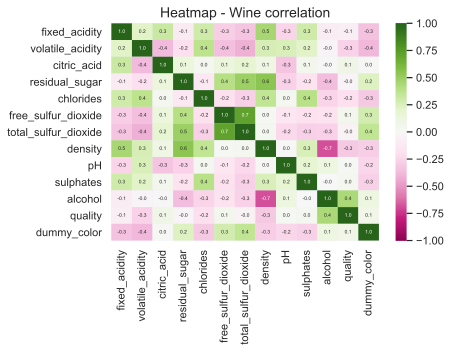

In [338]:
heatmap(df=df_dum,title="Wine")

In this heatmap, we don't see high correlation between the quality and other datas.

In descending order, the 3 strongest correlations with our target, the 'quality' of wine are :
    - alcohol          (0.4)
    - volatile acidity (-0.3)
    - density          (-0.3)
    
In descending order, we notice a strong correlation between the features themselves : 
    - red and white wine (-1)
    - alcohol and density (-0.7)
    - density and residual_sugar (-0.6)
    - density and fixed_acid (-0.5)
    - total_sulfure_dioxide and residual_sugar (-0.5)



## Visual Analysis

In [339]:
#pip install visualizer

In [340]:
import pandas as pd
from pandas_visual_analysis import VisualAnalysis
import seaborn as sns
VisualAnalysis(df_dum)

Selecting a graph with x = feature and y=Quality, we never see linear regression. We see only 
some parallel lines.
We also note that the distribution of the quality does not follow a normal distribution.

It can be interesting to test if there is a difference of quality between red and white wine

# Quality of red wine - Quality of white wine

In [341]:
df_red=df1.iloc[:,0].str.split(';', expand=True)

In [342]:
df_red.columns = df1.columns[0].split(';')

In [343]:
df_red.columns = df_red.columns.str.replace(' ', '_')

In [344]:
df_red.columns = df_red.columns.str.replace('"', '')

In [345]:
to_numeric(df=df_red)

In [346]:
df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


In [347]:
df_white=df2.iloc[:,0].str.split(';', expand=True)

In [348]:
df_white.columns = df2.columns[0].split(';')

In [349]:
df_white.columns = df_white.columns.str.replace(' ', '_')

In [350]:
df_white.columns = df_white.columns.str.replace('"', '')

In [351]:
to_numeric(df=df_white)

In [352]:
df_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         4898 non-null   float64
 1   volatile_acidity      4898 non-null   float64
 2   citric_acid           4898 non-null   float64
 3   residual_sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free_sulfur_dioxide   4898 non-null   float64
 6   total_sulfur_dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   float64
dtypes: float64(12)
memory usage: 459.3 KB


## correlation red wine

<AxesSubplot:title={'center':'Heatmap - Red Wine correlation'}>

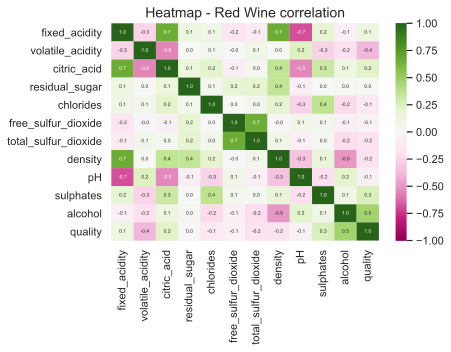

In [353]:
heatmap(df=df_red,title="Red Wine")

<AxesSubplot:title={'center':'Heatmap - White Wine correlation'}>

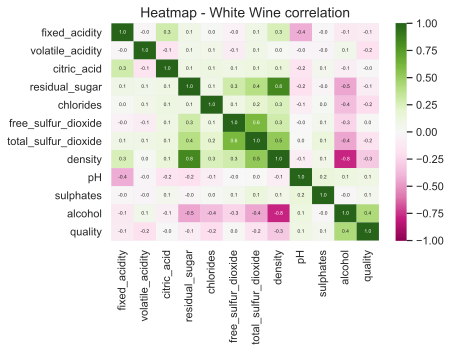

In [354]:
heatmap(df=df_white,title="White Wine")

We notice some differencies in the heatmap correlation between red wine and white wine.
Not too much between quality and other features but between the features themselves.

## Visual Analyses red wine

In [355]:
import pandas as pd
from pandas_visual_analysis import VisualAnalysis
import seaborn as sns
VisualAnalysis(df_red)

## Visual Analyses white wine

In [281]:
import pandas as pd
from pandas_visual_analysis import VisualAnalysis
import seaborn as sns
VisualAnalysis(df_white)

# Modelling

Import librairies

In [356]:
from statsmodels.formula.api import ols
from statsmodels.api import OLS

In [357]:
df_dum.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  dummy_color  
0      9.4      5.0          0.0  
1      9.8      5.0          0.0  
2      9.8      5.0          0.0  
3      9.8      6.0          0.0  
4      9.4      5.0          0.0

We test the model addind feature one by one.

## Test with feature alcohol

In [358]:
ols('quality ~ alcohol', data=df_dum).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.197
Model:                            OLS   Adj. R-squared:                  0.197
Method:                 Least Squares   F-statistic:                     1598.
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          1.50e-312
Time:                        03:18:25   Log-Likelihood:                -7623.4
No. Observations:                6497   AIC:                         1.525e+04
Df Residuals:                    6495   BIC:                         1.526e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4053      0.086     27.988      0.000       2.237       2.574
alcohol        0.3253      0.008     39.970      0.000       0.309       0.341
==============================================================================
Omnibus:                      123.922   Durbin-Watson:                   1.636
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.800
Skew:                           0.031   Prob(JB):                     6.34e-57
Kurtosis:                       3.976   Cond. No.                         94.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Even if R-squared is low : 0.20 (approx.), it is closed to Adj. R-squared value. It is a good point.
The P(t) is approximatively null so, we can consider that we have a linear relationship between the quality of wine (target) and the alcohol (feature).

## Test with feature alcohol and sulphates

In [359]:
ols('quality ~ alcohol+sulphates', data=df_dum).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     806.7
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          1.22e-313
Time:                        03:18:28   Log-Likelihood:                -7617.0
No. Observations:                6497   AIC:                         1.524e+04
Df Residuals:                    6494   BIC:                         1.526e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2802      0.093     24.603      0.000       2.098       2.462
alcohol        0.3254      0.008     40.018      0.000       0.309       0.341
sulphates      0.2337      0.065      3.586      0.000       0.106       0.362
==============================================================================
Omnibus:                      126.066   Durbin-Watson:                   1.625
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              263.892
Skew:                           0.040   Prob(JB):                     4.97e-58
Kurtosis:                       3.984   Cond. No.                         107.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared is always low : 0.20 (approx.) but it is closed to Adj. R-squared value. It is a good point. 
F-statistic: 806.7 is high and Prob (F-statistic) is close to 0(P(F-statistic)<0.05). There is a good amount of linear relationship between my target and the features.

The P(t) is approximatively null so, we can consider that we have a linear relationship between the quality of wine (target) and sulphates (feature).

## Test with feature alcohol, sulphates and pH

In [360]:
ols('quality ~ alcohol+sulphates+pH', data=df_dum).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.201
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     544.0
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          2.04e-315
Time:                        03:18:30   Log-Likelihood:                -7609.4
No. Observations:                6497   AIC:                         1.523e+04
Df Residuals:                    6493   BIC:                         1.525e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9869      0.204     14.651      0.000       2.587       3.387
alcohol        0.3294      0.008     40.234      0.000       0.313       0.345
sulphates      0.2838      0.066      4.277      0.000       0.154       0.414
pH            -0.2408      0.062     -3.891      0.000      -0.362      -0.119
==============================================================================
Omnibus:                      122.336   Durbin-Watson:                   1.634
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              252.695
Skew:                           0.040   Prob(JB):                     1.34e-55
Kurtosis:                       3.963   Cond. No.                         242.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared is always low : 0.20 (approx.) but it is closed to Adj. R-squared value. It is a good point. 
F-statistic: 544.0 is high and Prob (F-statistic) is close to 0(P(F-statistic)<0.05). There is a good amount of linear relationship between my tardet and the features.

The P(t) is approximatively null so, we can consider that we have a linear relationship between the quality of wine (target) and pH (feature).

## Test with feature alcohol, sulphates, pH, density

In [361]:
ols('quality ~ alcohol+volatile_acidity+density', data=df_reg).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     789.6
Date:                Mon, 05 Oct 2020   Prob (F-statistic):               0.00
Time:                        03:18:32   Log-Likelihood:                -7327.4
No. Observations:                6497   AIC:                         1.466e+04
Df Residuals:                    6493   BIC:                         1.469e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -35.1141      4.572     -7.679      0.000     -44.078     -26.151
alcohol              0.3825      0.011     34.935      0.000       0.361       0.404
volatile_acidity    -1.4909      0.060    -24.887      0.000      -1.608      -1.373
density             37.6250      4.522      8.321      0.000      28.761      46.489
==============================================================================
Omnibus:                      115.319   Durbin-Watson:                   1.653
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.492
Skew:                          -0.002   Prob(JB):                     7.30e-52
Kurtosis:                       3.933   Cond. No.                     7.39e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.39e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R-squared is always low : 0.27 (approx.) and it is closed to Adj. R-squared value. It is a good point. 
F-statistic: 789.6 is high and Prob (F-statistic) is close to 0(P(F-statistic)<0.05). There is a good amount of linear relationship between my target and the features.

The P(t) is approximatively null so, we can consider that we have a linear relationship between the quality of wine (target) and density (feature).

But now, a note has appeared indicating that there are strong multicollinearity or other numerical problems. This note has appeared by adding the feature density so we have to drop it.

## Test with feature alcohol, sulphates, pH and free_sulfur_dioxide

In [362]:
ols('quality ~ alcohol+sulphates+pH+free_sulfur_dioxide', data=df_dum).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.221
Method:                 Least Squares   F-statistic:                     462.5
Date:                Mon, 05 Oct 2020   Prob (F-statistic):               0.00
Time:                        03:18:34   Log-Likelihood:                -7523.2
No. Observations:                6497   AIC:                         1.506e+04
Df Residuals:                    6492   BIC:                         1.509e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               2.2420      0.209     10.729      0.000       1.832       2.652
alcohol                 0.3480      0.008     42.433      0.000       0.332       0.364
sulphates               0.4350      0.066      6.543      0.000       0.305       0.565
pH                     -0.1652      0.061     -2.694      0.007      -0.285      -0.045
free_sulfur_dioxide     0.0074      0.001     13.210      0.000       0.006       0.009
==============================================================================
Omnibus:                      161.089   Durbin-Watson:                   1.657
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              380.612
Skew:                           0.033   Prob(JB):                     2.24e-83
Kurtosis:                       4.184   Cond. No.                         826.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared is always low : 0.22 (approx.) and it is closed to Adj. R-squared value. It is a good point. F-statistic: 462.5 is high and Prob (F-statistic) is close to 0(P(F-statistic)<0.05). There is a good amount of linear relationship between my target and the features.

The P(t) is approximatively null so, we can consider that we have a linear relationship between the quality of wine (target) and free_sulfur_dioxide (feature).

P(t) for ph is now not null but is under 0.05 so it's ok.

## Test with feature alcohol, sulphates, pH, free_sulfur_dioxide and chlorides

In [363]:
ols('quality ~ alcohol+sulphates+pH+free_sulfur_dioxide+chlorides', data=df_dum).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.229
Method:                 Least Squares   F-statistic:                     387.2
Date:                Mon, 05 Oct 2020   Prob (F-statistic):               0.00
Time:                        03:18:40   Log-Likelihood:                -7489.8
No. Observations:                6497   AIC:                         1.499e+04
Df Residuals:                    6491   BIC:                         1.503e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               2.5541      0.211     12.084      0.000       2.140       2.968
alcohol                 0.3264      0.009     38.058      0.000       0.310       0.343
sulphates               0.6553      0.071      9.177      0.000       0.515       0.795
pH                     -0.1746      0.061     -2.861      0.004      -0.294      -0.055
free_sulfur_dioxide     0.0065      0.001     11.408      0.000       0.005       0.008
chlorides              -2.5714      0.314     -8.191      0.000      -3.187      -1.956
==============================================================================
Omnibus:                      154.408   Durbin-Watson:                   1.658
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              357.819
Skew:                           0.029   Prob(JB):                     2.00e-78
Kurtosis:                       4.148   Cond. No.                     1.23e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.23e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R-squared is always low : 0.23 (approx.) and it is closed to Adj. R-squared value. It is a good point. F-statistic: 387.2 is high and Prob (F-statistic) is close to 0(P(F-statistic)<0.05). There is a good amount of linear relationship between my target and the features.

The P(t) is approximatively null so, we can consider that we have a linear relationship between the quality of wine (target) and free_sulfur_dioxide (feature).

P(t) for ph is now not null but is under 0.05 so it's ok.

But now, a note has appeared indicating that there are strong multicollinearity or other numerical problems. This note has appeared by adding the feature density so we have to drop it.

## Test with feature alcohol, sulphates, pH, free_sulfur_dioxide and residual_sugar

In [364]:
ols('quality ~ alcohol+sulphates+pH+free_sulfur_dioxide+residual_sugar', data=df_dum).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.230
Method:                 Least Squares   F-statistic:                     389.0
Date:                Mon, 05 Oct 2020   Prob (F-statistic):               0.00
Time:                        03:18:40   Log-Likelihood:                -7486.5
No. Observations:                6497   AIC:                         1.498e+04
Df Residuals:                    6491   BIC:                         1.503e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.5787      0.222      7.122      0.000       1.144       2.013
alcohol                 0.3710      0.009     43.220      0.000       0.354       0.388
sulphates               0.4975      0.067      7.480      0.000       0.367       0.628
pH                     -0.0630      0.062     -1.015      0.310      -0.185       0.059
free_sulfur_dioxide     0.0057      0.001      9.671      0.000       0.005       0.007
residual_sugar          0.0204      0.002      8.595      0.000       0.016       0.025
==============================================================================
Omnibus:                      145.809   Durbin-Watson:                   1.663
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              329.664
Skew:                           0.019   Prob(JB):                     2.60e-72
Kurtosis:                       4.103   Cond. No.                         890.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared is always low : 0.23 (approx.) and it is closed to Adj. R-squared value. It is a good point. F-statistic: 462.5 is high and Prob (F-statistic) is close to 0(P(F-statistic)<0.05). There is a good amount of linear relationship between my target and the features.

The P(t) is approximatively null so, we can consider that we have a linear relationship between the quality of wine (target) and residual_sugar (feature).

P(t) for ph is now not null but is over 0.05 so we have to drop it in order to continue with residual_sugar

## Test with feature alcohol, sulphates, free_sulfur_dioxide, residual_sugar and citric_acid

In [365]:
ols('quality ~ alcohol+sulphates+free_sulfur_dioxide+residual_sugar+citric_acid', data=df_dum).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     395.5
Date:                Mon, 05 Oct 2020   Prob (F-statistic):               0.00
Time:                        03:18:49   Log-Likelihood:                -7473.9
No. Observations:                6497   AIC:                         1.496e+04
Df Residuals:                    6491   BIC:                         1.500e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.3341      0.107     12.441      0.000       1.124       1.544
alcohol                 0.3682      0.009     42.942      0.000       0.351       0.385
sulphates               0.4534      0.066      6.871      0.000       0.324       0.583
free_sulfur_dioxide     0.0054      0.001      9.165      0.000       0.004       0.007
residual_sugar          0.0194      0.002      8.283      0.000       0.015       0.024
citric_acid             0.3409      0.067      5.117      0.000       0.210       0.472
==============================================================================
Omnibus:                      144.161   Durbin-Watson:                   1.664
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              324.236
Skew:                           0.018   Prob(JB):                     3.92e-71
Kurtosis:                       4.094   Cond. No.                         438.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared is always low : 0.23 (approx.) and it is closed to Adj. R-squared value. It is a good point. F-statistic: 395.5 is high and Prob (F-statistic) is close to 0(P(F-statistic)<0.05). There is a good amount of linear relationship between my target and the features.

The P(t) is approximatively null so, we can consider that we have a linear relationship between the quality of wine (target) and citric_acid (feature).

## Test with feature alcohol, sulphates, free_sulfur_dioxide, residual_sugar, citric_acid and volatile_acidity

In [366]:
ols('quality ~ alcohol+sulphates+free_sulfur_dioxide+residual_sugar+citric_acid+volatile_acidity', data=df_dum).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     421.1
Date:                Mon, 05 Oct 2020   Prob (F-statistic):               0.00
Time:                        03:18:51   Log-Likelihood:                -7269.7
No. Observations:                6497   AIC:                         1.455e+04
Df Residuals:                    6490   BIC:                         1.460e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               2.1336      0.111     19.224      0.000       1.916       2.351
alcohol                 0.3488      0.008     41.705      0.000       0.332       0.365
sulphates               0.7322      0.065     11.199      0.000       0.604       0.860
free_sulfur_dioxide     0.0020      0.001      3.326      0.001       0.001       0.003
residual_sugar          0.0176      0.002      7.742      0.000       0.013       0.022
citric_acid            -0.1916      0.070     -2.753      0.006      -0.328      -0.055
volatile_acidity       -1.3525      0.066    -20.522      0.000      -1.482      -1.223
==============================================================================
Omnibus:                      125.096   Durbin-Watson:                   1.643
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              264.079
Skew:                           0.013   Prob(JB):                     4.53e-58
Kurtosis:                       3.987   Cond. No.                         473.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared is always low : 0.28 (approx.) and it is closed to Adj. R-squared value. It is a good point. F-statistic: 421.1 is high and Prob (F-statistic) is close to 0(P(F-statistic)<0.05). There is a good amount of linear relationship between my target and the features.

The P(t) is approximatively null so, we can consider that we have a linear relationship between the quality of wine (target) and volatile_acidity (feature).

P(t) for free_sulfur_dioxide and citric_acid are not null anymore but are under 0.05. We can continue.

## Test with feature alcohol, sulphates, free_sulfur_dioxide, residual_sugar, citric_acid, volatile_acidity and fixed_acidity

In [367]:
ols('quality ~ alcohol+sulphates+free_sulfur_dioxide+residual_sugar+citric_acid+volatile_acidity+fixed_acidity', data=df_dum).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     361.9
Date:                Mon, 05 Oct 2020   Prob (F-statistic):               0.00
Time:                        03:18:54   Log-Likelihood:                -7267.1
No. Observations:                6497   AIC:                         1.455e+04
Df Residuals:                    6489   BIC:                         1.460e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               2.0004      0.125     15.973      0.000       1.755       2.246
alcohol                 0.3519      0.008     41.560      0.000       0.335       0.368
sulphates               0.7038      0.067     10.581      0.000       0.573       0.834
free_sulfur_dioxide     0.0023      0.001      3.767      0.000       0.001       0.004
residual_sugar          0.0179      0.002      7.864      0.000       0.013       0.022
citric_acid            -0.2713      0.078     -3.488      0.000      -0.424      -0.119
volatile_acidity       -1.3927      0.068    -20.427      0.000      -1.526      -1.259
fixed_acidity           0.0199      0.009      2.292      0.022       0.003       0.037
==============================================================================
Omnibus:                      126.884   Durbin-Watson:                   1.647
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              269.834
Skew:                           0.005   Prob(JB):                     2.55e-59
Kurtosis:                       3.998   Cond. No.                         518.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared is always low : 0.28 (approx.) and it is closed to Adj. R-squared value. It is a good point. F-statistic: 361.9 is high and Prob (F-statistic) is close to 0(P(F-statistic)<0.05). There is a good amount of linear relationship between my target and the features.

The P(t) is approximatively null so, we can consider that we have a linear relationship between the quality of wine (target) and fixed_acidity (feature).

P(t) for fixed_acidity is not null anymore but is under 0.05. 

In [407]:
## Test with feature alcohol, sulphates, free_sulfur_dioxide, residual_sugar, citric_acid, volatile_acidity,fixed_acidity, dummy_color

In [406]:
ols('quality ~ alcohol+sulphates+free_sulfur_dioxide+residual_sugar+citric_acid+volatile_acidity+fixed_acidity+dummy_color', data=df_dum).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                     330.0
Date:                Mon, 05 Oct 2020   Prob (F-statistic):               0.00
Time:                        03:31:22   Log-Likelihood:                -7228.8
No. Observations:                6497   AIC:                         1.448e+04
Df Residuals:                    6488   BIC:                         1.454e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               2.1180      0.125     16.912      0.000       1.872       2.363
alcohol                 0.3650      0.009     42.691      0.000       0.348       0.382
sulphates               0.6356      0.067      9.546      0.000       0.505       0.766
free_sulfur_dioxide     0.0028      0.001      4.523      0.000       0.002       0.004
residual_sugar          0.0214      0.002      9.339      0.000       0.017       0.026
citric_acid            -0.3177      0.077     -4.100      0.000      -0.470      -0.166
volatile_acidity       -1.5527      0.070    -22.118      0.000      -1.690      -1.415
fixed_acidity           0.0077      0.009      0.885      0.376      -0.009       0.025
dummy_color            -0.1888      0.022     -8.762      0.000      -0.231      -0.147
==============================================================================
Omnibus:                      136.482   Durbin-Watson:                   1.659
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              299.362
Skew:                          -0.016   Prob(JB):                     9.87e-66
Kurtosis:                       4.051   Cond. No.                         522.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
R-squared is always low : 0.29 (approx.) and it is closed to Adj. R-squared value. It is a good point. F-statistic: 330.0 is high and Prob (F-statistic) is close to 0(P(F-statistic)<0.05). There is a good amount of linear relationship between my target and the features.

The P(t) is approximatively null so, we can consider that we have a linear relationship between the quality of wine (target) and fixed_acidity (feature).

P(t) for fixed_acidity is not null anymore but is over 0.05.

# Models

1. ols('quality ~ alcohol+sulphates+free_sulfur_dioxide+residual_sugar+citric_acid+volatile_acidity+fixed_acidity', data=df_dum).fit().summary()


2. ols('quality ~ alcohol+sulphates+free_sulfur_dioxide+residual_sugar+citric_acid+volatile_acidity+dummy_color', data=df_dum).fit().summary()


3. ols('quality ~ alcohol+sulphates+pH+free_sulfur_dioxide+chlorides', data=df_dum).fit().summary()

# Red Wine - test with alcohol+sulphates+free_sulfur_dioxide+residual_sugar+citric_acid+volatile_acidity+fixed_acidity

In [368]:
ols('quality ~ alcohol+sulphates+free_sulfur_dioxide+residual_sugar+citric_acid+volatile_acidity+fixed_acidity', data=df_red).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                     119.4
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          5.42e-141
Time:                        03:19:00   Log-Likelihood:                -1589.1
No. Observations:                1599   AIC:                             3194.
Df Residuals:                    1591   BIC:                             3237.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               2.2586      0.231      9.763      0.000       1.805       2.712
alcohol                 0.3181      0.016     19.830      0.000       0.287       0.350
sulphates               0.7086      0.103      6.882      0.000       0.507       0.911
free_sulfur_dioxide    -0.0017      0.002     -1.011      0.312      -0.005       0.002
residual_sugar          0.0014      0.012      0.115      0.909      -0.022       0.025
citric_acid            -0.4660      0.138     -3.382      0.001      -0.736      -0.196
volatile_acidity       -1.3481      0.114    -11.804      0.000      -1.572      -1.124
fixed_acidity           0.0548      0.013      4.123      0.000       0.029       0.081
==============================================================================
Omnibus:                       27.120   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.399
Skew:                          -0.139   Prob(JB):                     3.77e-10
Kurtosis:                       3.757   Cond. No.                         329.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared is always low : 0.34 (approx.) and it is closed to Adj. R-squared value. It is a good point. F-statistic: 119.4 is high and Prob (F-statistic) is close to 0(P(F-statistic)<0.05). There is a good amount of linear relationship between my target and the features.

The P(t) are approximatively null so for  most of the features butt not for free_sulfur_dioxide and residual_sugar.

In [369]:
ols('quality ~ alcohol+sulphates+volatile_acidity+fixed_acidity', data=df_red).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                     204.5
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          1.22e-141
Time:                        03:19:02   Log-Likelihood:                -1595.5
No. Observations:                1599   AIC:                             3201.
Df Residuals:                    1594   BIC:                             3228.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            2.3128      0.223     10.378      0.000       1.876       2.750
alcohol              0.3148      0.016     19.800      0.000       0.284       0.346
sulphates            0.6422      0.101      6.330      0.000       0.443       0.841
volatile_acidity    -1.1552      0.100    -11.586      0.000      -1.351      -0.960
fixed_acidity        0.0275      0.010      2.775      0.006       0.008       0.047
==============================================================================
Omnibus:                       25.113   Durbin-Watson:                   1.746
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.273
Skew:                          -0.134   Prob(JB):                     2.97e-09
Kurtosis:                       3.720   Cond. No.                         190.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# White Wine - test with alcohol+sulphates+free_sulfur_dioxide+residual_sugar+citric_acid+volatile_acidity+fixed_acidity

In [370]:
ols('quality ~ alcohol+sulphates+free_sulfur_dioxide+residual_sugar+volatile_acidity+fixed_acidity', data=df_white).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.270
Method:                 Least Squares   F-statistic:                     302.8
Date:                Mon, 05 Oct 2020   Prob (F-statistic):               0.00
Time:                        03:19:06   Log-Likelihood:                -5581.1
No. Observations:                4898   AIC:                         1.118e+04
Df Residuals:                    4891   BIC:                         1.122e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               2.4462      0.164     14.894      0.000       2.124       2.768
alcohol                 0.3778      0.010     37.666      0.000       0.358       0.397
sulphates               0.4123      0.095      4.336      0.000       0.226       0.599
free_sulfur_dioxide     0.0036      0.001      5.247      0.000       0.002       0.005
residual_sugar          0.0245      0.002      9.918      0.000       0.020       0.029
volatile_acidity       -2.0402      0.109    -18.740      0.000      -2.254      -1.827
fixed_acidity          -0.0668      0.013     -5.148      0.000      -0.092      -0.041
==============================================================================
Omnibus:                      106.468   Durbin-Watson:                   1.626
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              225.207
Skew:                           0.078   Prob(JB):                     1.25e-49
Kurtosis:                       4.039   Cond. No.                         647.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The model is ok with white wine.


There are 3 times more lines for white wines than for red wines. Our model has been tested on the entire dataframe (white and red wines). The white wine is preponderant, it is normal that the model works very well with the dataframe which contains only the white wines.

# P Haking

In [374]:
def foo(col, X, y=y):
    if col:
        X1=X.drop(col, axis=1).copy()
    else:
        X1=X
    display(OLS(y,add_constant(X1)).fit().summary())
    return X1

NameError: name 'y' is not defined

In [372]:
#we drop chlorides column because of the pvalue
foo('chlorides', X, y=y)

NameError: name 'foo' is not defined

In [373]:
foo('citric_acid', X, y=y)

NameError: name 'foo' is not defined

# Assumptions

## Class for testing the Assumptions

In [389]:
class Assumption_Tester_OLS:
    """
    X - Pandas DataFrame with numerical values. Independent Variable
    y - Series with numerical values. Dependent Variable
    
    Tests a linear regression on the model to see if assumptions are being met

    """
    
    from sklearn.linear_model import LinearRegression
    
    def __init__(self, X,y):
        from numpy import ndarray
        from pandas import concat
        from pandas.core.frame import DataFrame
        from pandas.core.series import Series

        if type(X) == ndarray:
            self.features = ['X'+str(feature+1) for feature in range(X.shape[1])]
        elif type(X) == DataFrame:
            self.features=X.columns.to_list()
        else:
            print('Expected numpy array or pandas dataframe as X')
            return
        if type(y) == ndarray:
            self.output = 'y'
        elif type(y) == DataFrame:
            self.output=y.columns[0]
        elif type(y) == Series:
            self.output=y.name
        else:
            print('Expected numpy array or pandas dataframe as X')
            return

        self.X = X.values if type(X)==DataFrame else X
        self.y=y.iloc[:,0].values if type(y)==DataFrame else y.values if type(y)==Series else y
        
        self.model='not built yet'
        self.r2=0
        self.results={'Satisfied':[],'Potentially':[],'Violated':[]}
    
    def fit_model(self):
        from sklearn.linear_model import LinearRegression
        
        print('Fitting linear regression')        
        
        #Multi-threading when needed
        if self.X.shape[0] > 100000:
            self.model = LinearRegression(n_jobs=-1)
        else:
            self.model = LinearRegression()
        self.model.fit(self.X, self.y)
        
        self.predictions = self.model.predict(self.X)
        self.resid = self.y - self.predictions
        
        
    def build_model(self):
        self.fit_model()
        
        # Returning linear regression R^2 and coefficients before performing diagnostics
        self.r2 = self.model.score(self.X, self.y)
        print()
        print('R^2:', self.r2, '\n')
        print('Coefficients')
        print('-------------------------------------')
        print('Intercept:', self.model.intercept_)
        for idx,feature in enumerate(self.model.coef_):
            print(f'{self.features[idx]}: {round(feature,2)}')

    def linearity(self):
        """
        Linearity: Assumes there is a linear relationship between the predictors and
                   the response variable. If not, either a polynomial term or another
                   algorithm should be used.
        """
        from pandas import concat
        from numpy import arange
        from pandas.core.frame import DataFrame
        from pandas.core.series import Series        
        import seaborn as sns
        sns.set()
        import matplotlib.pyplot as plt
        
        if type(self.model)==str:
            self.fit_model()
        
        print('\n=======================================================================================')
        print('Assumption 1: Linear Relationship between the Target and the Features')
        print('Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.')
        
        # Plotting the actual vs predicted values
        sns.regplot(self.y,self.predictions, fit_reg=False)
        
        # Plotting the diagonal line
        line_coords = arange(min(self.y.min(),self.predictions.min()), max(self.y.max(),self.predictions.max()))
        plt.plot(line_coords, line_coords,  # X and y points
                 color='darkorange', linestyle='--')
        plt.title('Actual vs. Predicted')
        plt.show()
        print('If non-linearity is apparent, consider adding a polynomial term \n\t\tor using box-cox transformation to make X or y follow normal distribution')
        
        print('\n\n\nBuilding a correlation table')
        print('\n=======================================================================================')
        df=concat([DataFrame(self.X),Series(self.y)],axis=1)
        df.columns=self.features+[self.output]
        df_corr=df[df.nunique()[df.nunique()>2].index].corr()[self.output].drop(self.output)
        
        print(f'\nParameters that are most likely VIOLATE linearity assumption and their correlation with {self.output}')
        display(df_corr[abs(df_corr)<0.25])

        print(f'\nParameters that are most likely FOLLOW linearity assumption and their correlation with {self.output}')
        display(df_corr[abs(df_corr)>=0.25])
        
        
        if df_corr[abs(df_corr)<0.25].shape[0]==0:
            self.results['Satisfied'].append('Linearity')
        elif df_corr[abs(df_corr)>=0.25].shape[0]==0:
            self.results['Violated'].append('Linearity')
        else:
            self.results['Potentially'].append('Linearity')
        
    def multicollinearity(self):
        """
        Multicollinearity: Assumes that predictors are not correlated with each other. If there is
                           correlation among the predictors, then either remove prepdictors with high
                           Variance Inflation Factor (VIF) values or perform dimensionality reduction
                           This assumption being violated causes issues with interpretability of the 
                           coefficients and the standard errors of the coefficients.
        """
        from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
        import matplotlib.pyplot as plt
        import seaborn as sns
        from pandas.core.frame import DataFrame
        sns.set()
        
        if type(self.model)==str:
            self.fit_model()
            
        print('\n=======================================================================================')
        print('Assumption 2: Little to no multicollinearity among predictors')
        # Plotting the heatmap
        plt.figure(figsize = (10,8))
        sns.heatmap(DataFrame(self.X, columns=self.features).corr(), annot=len(self.features)<10, center=0, cmap=sns.diverging_palette(220, 20, as_cmap=True))
        plt.title('Correlation of Variables')
        plt.show()
        print('Variance Inflation Factors (VIF)')
        print('> 10: An indication that multicollinearity may be present')
        print('> 100: Certain multicollinearity among the variables')
        print('-------------------------------------')
        # Gathering the VIF for each variable
        vifs = {i:VIF(self.X, idx) for idx,i in enumerate(self.features)}
        vifs = dict(sorted(vifs.items(), key=lambda x: x[1], reverse=True))
        for key, vif in vifs.items():
            print(f'{key}: {vif}')
        # Gathering and printing total cases of possible or definite multicollinearity
        possible_multicollinearity = sum([1 for vif in vifs.values() if vif > 10])
        definite_multicollinearity = sum([1 for vif in vifs.values() if vif > 100])
        print()
        print(f'{possible_multicollinearity} cases of possible multicollinearity')
        print(f'{definite_multicollinearity} cases of definite multicollinearity')
        print()
        if definite_multicollinearity == 0:
            if possible_multicollinearity == 0:
                print('Assumption satisfied')
                self.results['Satisfied'].append('Multicollinearity')
            else:
                print('Assumption possibly satisfied')
                print()
                print('Coefficient interpretability may be problematic')
                print('Consider removing variables with a high Variance Inflation Factor (VIF)')
                self.results['Potentially'].append('Multicollinearity')

        else:
            print('Assumption not satisfied')
            print()
            print('Coefficient interpretability will be problematic')
            print('Consider removing variables with a high Variance Inflation Factor (VIF)')
            self.results['Violated'].append('Multicollinearity')
            

    
    def autocorrelation(self):
        """
        Autocorrelation: Assumes that there is no autocorrelation in the residuals. If there is
                         autocorrelation, then there is a pattern that is not explained due to
                         the current value being dependent on the previous value.
                         This may be resolved by adding a lag variable of either the dependent
                         variable or some of the predictors.
        """
        from statsmodels.stats.stattools import durbin_watson        
        
        if type(self.model)==str:
            self.fit_model()
        print('\n=======================================================================================')
        print('Assumption 3: No Autocorrelation')
        print('\nPerforming Durbin-Watson Test')
        print('Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data')
        print('0 to 2< is positive autocorrelation')
        print('>2 to 4 is negative autocorrelation')
        print('-------------------------------------')
        durbinWatson = durbin_watson(self.resid)
        print('Durbin-Watson:', durbinWatson)
        if durbinWatson < 1.5:
            print('Signs of positive autocorrelation', '\n')
            print('Assumption not satisfied', '\n')
            self.results['Violated'].append('Autocorrelation')
        elif durbinWatson > 2.5:
            print('Signs of negative autocorrelation', '\n')
            print('Assumption not satisfied', '\n')
            self.results['Violated'].append('Autocorrelation')
        else:
            print('Little to no autocorrelation', '\n')
            print('Assumption satisfied')
            self.results['Satisfied'].append('Autocorrelation')
            

    def homoskedasticity(self,p_value_thresh=0.05):
        """
        Homoskedasticity: Assumes that the errors exhibit constant variance
        """
        
        from statsmodels.stats.diagnostic import het_breuschpagan
        
        import matplotlib.pyplot as plt
        import seaborn
        from numpy import repeat
        seaborn.set()
        
        if type(self.model)==str:
            self.fit_model()
            
        print('\n=======================================================================================')
        print('Assumption 4: Homoskedasticity of Error Terms')
        print('Residuals should have relative constant variance')
        # Plotting the residuals
        plt.subplots(figsize=(12, 6))
        ax = plt.subplot(111)  # To remove spines
        plt.scatter(x=range(self.X.shape[0]), y=self.resid, alpha=0.5)
        plt.plot(repeat(0, self.X.shape[0]), color='darkorange', linestyle='--')
        ax.spines['right'].set_visible(False)  # Removing the right spine
        ax.spines['top'].set_visible(False)  # Removing the top spine
        plt.title('Residuals')
        plt.show() 
        print('If heteroskedasticity is apparent, confidence intervals and predictions will be affected')        
        print('\nConsider removing outliers and preprocessing features - nonlinear transformation can help')
        
        lnames=['Lagrange Multiplier', 'pvalue for LM','F stats','pvalue for Fstats']
        display({lnames[idx]:het_breuschpagan(self.resid,self.X)[idx] for idx in range(4)})
        if het_breuschpagan(self.resid,self.X)[3] < p_value_thresh:
            print('Signs of positive autocorrelation', '\n')
            print('Assumption potentially not satisfied', '\n')
            self.results['Potentially'].append('Autocorrelation')
        else:
            print('Signs of negative autocorrelation', '\n')
            print('Assumption satisfied', '\n')
            self.results['Satisfied'].append('Autocorrelation')

       
        
    def normality_resid(self,p_value_thresh=0.05):
        """
        Normality: Assumes that the error terms are normally distributed. If they are not,
        nonlinear transformations of variables may solve this.
        This assumption being violated primarily causes issues with the confidence intervals
        """
        from statsmodels.stats.diagnostic import normal_ad
        from scipy.stats import probplot
        import pylab
        import matplotlib.pyplot as plt
        import seaborn as sns
        from numpy import quantile,logical_or
        sns.set()

        if type(self.model)==str:
            self.fit_model()
            
        print('\n=======================================================================================')
        print('Assumption 5: The error terms are kinda normally distributed')
        print()
        print('Using the Anderson-Darling test for normal distribution')
        # Performing the test on the residuals
        p_value = normal_ad(self.resid)[1]
        print('p-value from the test - below 0.05 generally means non-normal:', p_value)
        # Reporting the normality of the residuals
        if p_value < p_value_thresh:
            print('Residuals are not normally distributed')
        else:
            print('Residuals are normally distributed')
        # Plotting the residuals distribution
        plt.subplots(figsize=(12, 6))
        plt.title('Distribution of Residuals')
        sns.distplot(self.resid)
        plt.show()
        print()
        if p_value > p_value_thresh:
            print('Assumption satisfied')
            self.results['Satisfied'].append('Normality')
        else:
            print('Assumption not satisfied')
            self.results['Violated'].append('Normality')
            print()
            print('Confidence intervals will likely be affected')
            print('Try performing nonlinear transformations on variables')
    
    
        print('Building a probability plot')
        quantiles=probplot(self.resid, dist='norm', plot=pylab);
        plt.show()
        qqq=(quantiles[0][1]-quantiles[0][1].mean())/quantiles[0][1].std()-quantiles[0][0]
        q75=quantile(qqq,0.75)
        q25=quantile(qqq,0.25)

        outliers_share=(logical_or(qqq>q75+(q75-q25)*1.7, qqq<q25-(q75-q25)*1.7).sum()/qqq.shape[0]).round(3)
        if outliers_share<0.005:
            print('Assumption can be considered as satisfied.')
            self.results['Satisfied'].append('Sub-Normality')
        elif outliers_share<0.05:
            self.results['Potentially'].append('Sub-Normality')
            print(f'\nIn your dataset you quite fat tails. You have {outliers_share} potential outliers ({logical_or(qqq>q75+(q75-q25)*1.7, qqq<q25-(q75-q25)*1.7).sum()} rows)')
        else:
            print(f'\nIn fact outliers are super significant. Probably it is better to split your dataset into 2 different ones.')
            self.results['Violated'].append('Sub-Normality')


    def run_all(self):
        self.build_model()
        self.linearity()
        self.multicollinearity()
        self.autocorrelation()
        self.homoskedasticity()
        self.normality_resid()
        display(self.results)


# Assumptions

## model with alcohol+sulphates+free_sulfur_dioxide+residual_sugar+citric_acid+volatile_acidity+fixed_acidity', data

In [414]:
from Assumptions import Assumption_Tester_OLS as ast

In [415]:
y=df_dum.quality# our target
X=df_dum.drop(['chlorides','total_sulfur_dioxide','density','pH','quality','dummy_color'], axis=1)# our features

In [416]:
y.iloc[0]

5.0

Fitting linear regression

R^2: 0.280802705146903 

Coefficients
-------------------------------------
Intercept: 2.0004402733966926
fixed_acidity: 0.02
volatile_acidity: -1.39
citric_acid: -0.27
residual_sugar: 0.02
free_sulfur_dioxide: 0.0
sulphates: 0.7
alcohol: 0.35

Assumption 1: Linear Relationship between the Target and the Features
Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


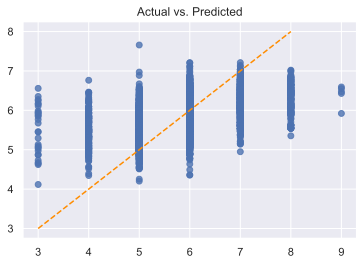

If non-linearity is apparent, consider adding a polynomial term 
		or using box-cox transformation to make X or y follow normal distribution



Building a correlation table


Parameters that are most likely VIOLATE linearity assumption and their correlation with quality


fixed_acidity         -0.076743
citric_acid            0.085532
residual_sugar        -0.036980
free_sulfur_dioxide    0.055463
sulphates              0.038485
Name: quality, dtype: float64


Parameters that are most likely FOLLOW linearity assumption and their correlation with quality


volatile_acidity   -0.265699
alcohol             0.444319
Name: quality, dtype: float64


Assumption 2: Little to no multicollinearity among predictors


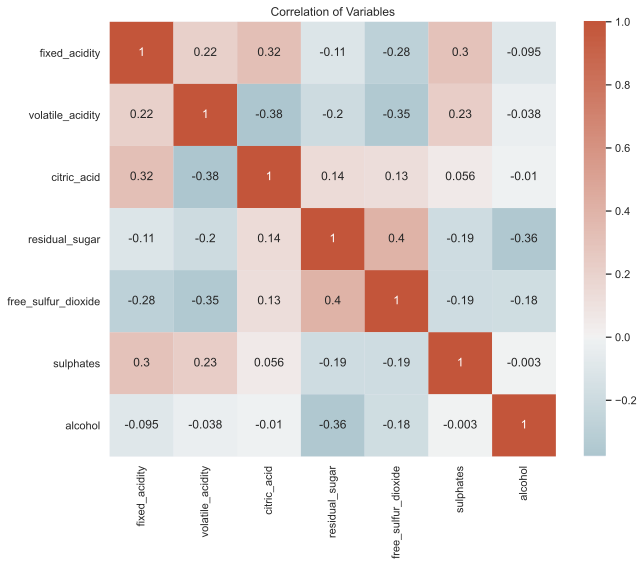

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------
fixed_acidity: 37.6650398730668
alcohol: 27.150553258049968
sulphates: 15.381988491841053
citric_acid: 8.758386085958879
volatile_acidity: 7.5794765554193475
free_sulfur_dioxide: 4.893891410096625
residual_sugar: 2.8201997594013353

3 cases of possible multicollinearity
0 cases of definite multicollinearity

Assumption possibly satisfied

Coefficient interpretability may be problematic
Consider removing variables with a high Variance Inflation Factor (VIF)

Assumption 3: No Autocorrelation

Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 1.6473080659421884
Little to no autocorrelation 

Assumption satisfied

Assumption 

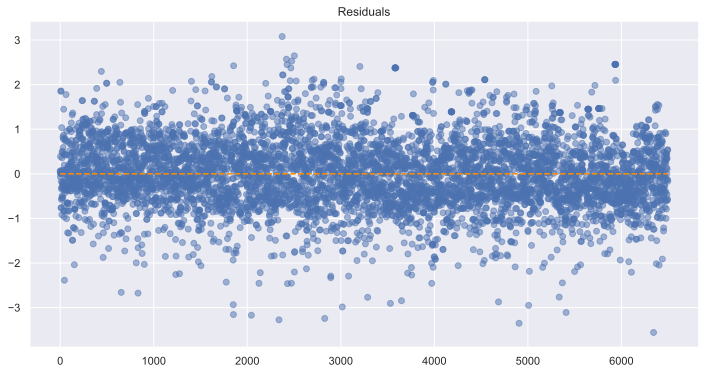

If heteroskedasticity is apparent, confidence intervals and predictions will be affected

Consider removing outliers and preprocessing features - nonlinear transformation can help


{'Lagrange Multiplier': 1673.4155574739104,
 'pvalue for LM': 0.0,
 'F stats': 321.6477911043178,
 'pvalue for Fstats': 0.0}

Signs of positive autocorrelation 

Assumption potentially not satisfied 


Assumption 5: The error terms are kinda normally distributed

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 2.9049630153038426e-26
Residuals are not normally distributed


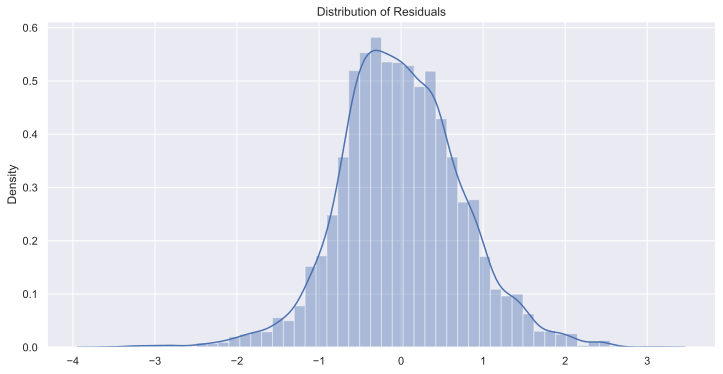


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables
Building a probability plot


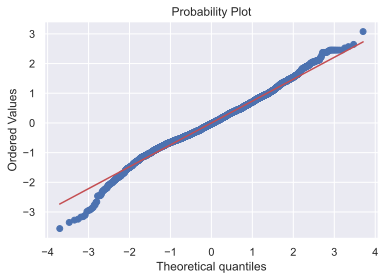


In your dataset you quite fat tails. You have 0.028 potential outliers (180 rows)


{'Satisfied': ['Autocorrelation'],
 'Potentially': ['Linearity',
  'Multicollinearity',
  'Autocorrelation',
  'Sub-Normality'],
 'Violated': ['Normality']}

In [417]:
ast(X,y).run_all()

Assumption 1: Linear Relationship between the Target and the Features: KO
Parameters that are most likely FOLLOW linearity assumption and their correlation with quality
volatile_acidity   -0.265699
alcohol             0.444319


Assumption 2: multicollinearity :OK
3 cases of possible multicollinearity

Assumption 3: No Autocorrelation : ok

Homoskedasticity of Error Terms : OK

Assumption 5: The error terms are kinda normally distributed: KO

## model with volatile_acidity and alcohol only

In [418]:
from Assumptions import Assumption_Tester_OLS as ast

In [423]:
y=df_dum.quality# our target
X=df_dum.drop(['chlorides','total_sulfur_dioxide','density','pH','quality','fixed_acidity','citric_acid','residual_sugar','free_sulfur_dioxide','sulphates','dummy_color'], axis=1)# our features

In [424]:
y.iloc[0]

5.0

In [425]:
type(y)

pandas.core.series.Series

In [426]:
X

volatile_acidity  alcohol
0                 0.70      9.4
1                 0.88      9.8
2                 0.76      9.8
3                 0.28      9.8
4                 0.70      9.4
...                ...      ...
4893              0.21     11.2
4894              0.32      9.6
4895              0.24      9.4
4896              0.29     12.8
4897              0.21     11.8

[6497 rows x 2 columns]

Fitting linear regression

R^2: 0.259495526079219 

Coefficients
-------------------------------------
Intercept: 2.9265589116681916
volatile_acidity: -1.32
alcohol: 0.32

Assumption 1: Linear Relationship between the Target and the Features
Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


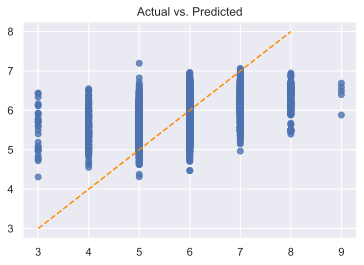

If non-linearity is apparent, consider adding a polynomial term 
		or using box-cox transformation to make X or y follow normal distribution



Building a correlation table


Parameters that are most likely VIOLATE linearity assumption and their correlation with quality


Series([], Name: quality, dtype: float64)


Parameters that are most likely FOLLOW linearity assumption and their correlation with quality


volatile_acidity   -0.265699
alcohol             0.444319
Name: quality, dtype: float64


Assumption 2: Little to no multicollinearity among predictors


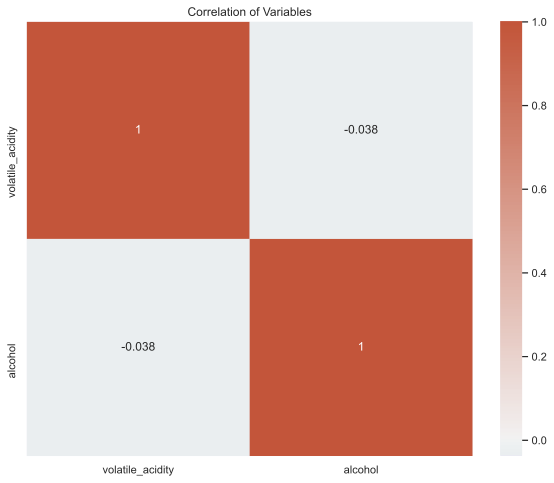

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------
volatile_acidity: 4.905344176790129
alcohol: 4.905344176790123

0 cases of possible multicollinearity
0 cases of definite multicollinearity

Assumption satisfied

Assumption 3: No Autocorrelation

Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 1.6448209026131695
Little to no autocorrelation 

Assumption satisfied

Assumption 4: Homoskedasticity of Error Terms
Residuals should have relative constant variance


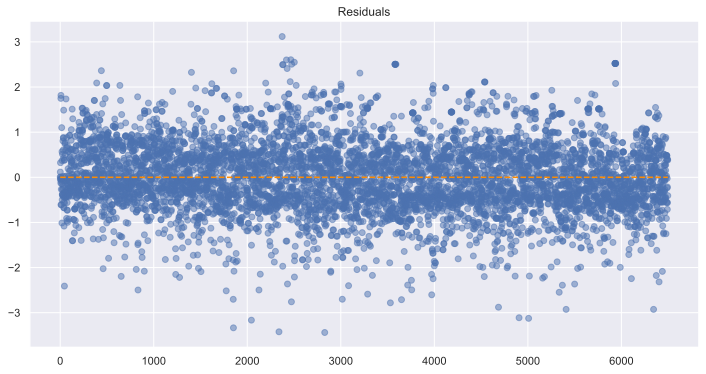

If heteroskedasticity is apparent, confidence intervals and predictions will be affected

Consider removing outliers and preprocessing features - nonlinear transformation can help


{'Lagrange Multiplier': 1690.3448098459007,
 'pvalue for LM': 0.0,
 'F stats': 1142.0404736372561,
 'pvalue for Fstats': 0.0}

Signs of positive autocorrelation 

Assumption potentially not satisfied 


Assumption 5: The error terms are kinda normally distributed

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.0
Residuals are not normally distributed


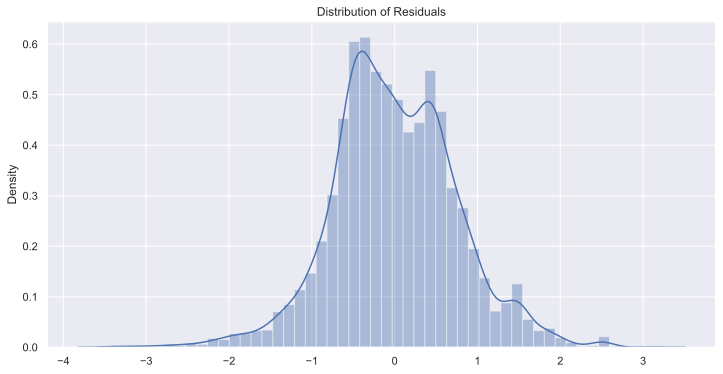


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables
Building a probability plot


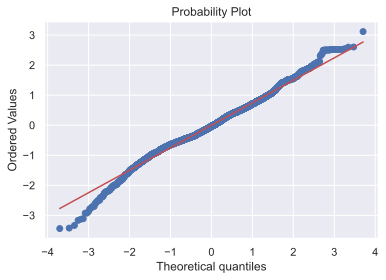


In your dataset you quite fat tails. You have 0.016 potential outliers (101 rows)


{'Satisfied': ['Linearity', 'Multicollinearity', 'Autocorrelation'],
 'Potentially': ['Autocorrelation', 'Sub-Normality'],
 'Violated': ['Normality']}

In [427]:
ast(X,y).run_all()

In [294]:
y.unique()

array([5., 6., 7., 4., 8., 3., 9.])

## polynomial function apply to X

In [286]:
y=df_reg.quality# our target
X=df_reg.drop(['density', 'pH','alcohol','quality','fixed_acidity'], axis=1)# our features

In [291]:
# Fitting Polynomial Regression to the dataset 
from sklearn.preprocessing import PolynomialFeatures 
  
poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(X)

# RandomForestRegressor

In [442]:
from sklearn.ensemble import RandomForestRegressor

In [443]:
y=df_dum.quality# our target
X=df_dum.drop(['chlorides','total_sulfur_dioxide','density','pH','quality','dummy_color'], axis=1)# our features

In [444]:
lr=RandomForestRegressor()
lr.fit(X,y)

RandomForestRegressor()

In [445]:
lr.predict(X)

array([5.06, 4.85, 5.08, ..., 5.83, 6.85, 5.87])

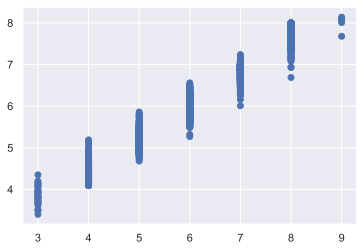

In [446]:
plt.scatter(y,lr.predict(X))

In [447]:
from sklearn.metrics import r2_score

In [448]:
r2_score(y,lr.predict(X))

0.9339573966253394

In [449]:
confusion_matrix(y,lr.predict(X))

NameError: name 'confusion_matrix' is not defined